# Predicting the flow 

## Decision tree regression

### Importing necessary libraries

In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import datetime as dt
import numpy as np

### Loading the data set

In [2]:
flow = pd.read_csv('../dataset/flow1.csv', parse_dates=['time'])
flow.head()

,time,flow
0,2015-06-01 14:15:00,115.559998
1,2015-06-01 14:20:00,115.199997
2,2015-06-01 14:25:00,112.209999
3,2015-06-01 14:30:00,112.860001
4,2015-06-01 14:35:00,113.349998


### Preparing the data 
Making the mean for each hour, reseting the index put on the time and leaving only integer representing the current hour

In [3]:
flow_h = pd.read_csv('../dataset/flow1.csv', parse_dates={'hour':['time']},index_col='hour')
dayfirst=True
flow_h = flow_h.resample('60T').mean()

In [4]:
flow_h = flow_h.reset_index()

In [5]:
flow_h['time'] = flow_h['hour']
flow_h.head()

,hour,flow,time
0,2015-06-01 14:00:00,113.754443,2015-06-01 14:00:00
1,2015-06-01 15:00:00,113.013333,2015-06-01 15:00:00
2,2015-06-01 16:00:00,114.081666,2015-06-01 16:00:00
3,2015-06-01 17:00:00,116.459167,2015-06-01 17:00:00
4,2015-06-01 18:00:00,123.825000,2015-06-01 18:00:00


### Taking only the hour of the flow from the datetime column

In [6]:
flow_h['hour'] = (flow_h['hour'].dt.hour)

In [7]:
flow_h.head()

,hour,flow,time
0,14,113.754443,2015-06-01 14:00:00
1,15,113.013333,2015-06-01 15:00:00
2,16,114.081666,2015-06-01 16:00:00
3,17,116.459167,2015-06-01 17:00:00
4,18,123.825000,2015-06-01 18:00:00


### Splitting the data set into train and test sets

In [8]:
split_date = pd.datetime(2016,12,31,23,59)

flow_training = flow_h.loc[flow_h['time'] <= split_date]
flow_test = flow_h.loc[flow_h['time'] > split_date]

flow_training = flow_training.dropna()

In [9]:
flow_training.head()

,hour,flow,time
0,14,113.754443,2015-06-01 14:00:00
1,15,113.013333,2015-06-01 15:00:00
2,16,114.081666,2015-06-01 16:00:00
3,17,116.459167,2015-06-01 17:00:00
4,18,123.825000,2015-06-01 18:00:00


In [10]:
flow_test.head()

,hour,flow,time
13906,0,94.330833,2017-01-01 00:00:00
13907,1,91.927501,2017-01-01 01:00:00
13908,2,90.722501,2017-01-01 02:00:00
13909,3,87.402501,2017-01-01 03:00:00
13910,4,81.485833,2017-01-01 04:00:00


In [11]:
X_flow_training = flow_training['hour']
Y_flow_training = flow_training['flow']

X_flow_test = flow_test['hour']
Y_flow_test = flow_test['flow']

### Reshaping the data to 2D array

In [12]:
X_flow_training = X_flow_training.values.reshape(-1,1)

In [14]:
X_flow_test = X_flow_test.values.reshape(-1,1)

### Creating a regression tree model

In [16]:
regressor = DecisionTreeRegressor()
regressor.fit(X_flow_training, Y_flow_training)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Predicting the value on unknown test data

In [17]:
predict = regressor.predict(X_flow_test)

### Plot for the tree regression model

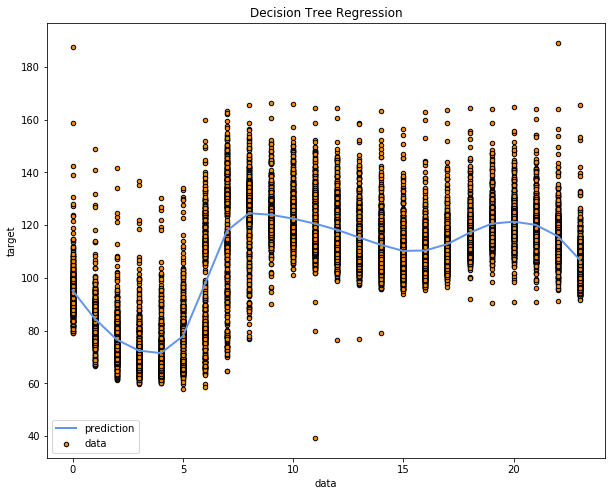

In [18]:
plt.figure(figsize=(10, 8))
plt.scatter(X_flow_training, Y_flow_training, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_flow_test[0:24], predict[:24], color="cornflowerblue",
         label="prediction", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Implementing metrics (mean absolute percentage error)

In [19]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### MAPE for tree regression

In [20]:
mape_tree = mean_absolute_percentage_error(Y_flow_test, predict)
mape_tree

8.828383361103521